In [2]:
import scipy.optimize
import math
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import itertools
from tqdm.notebook import tqdm

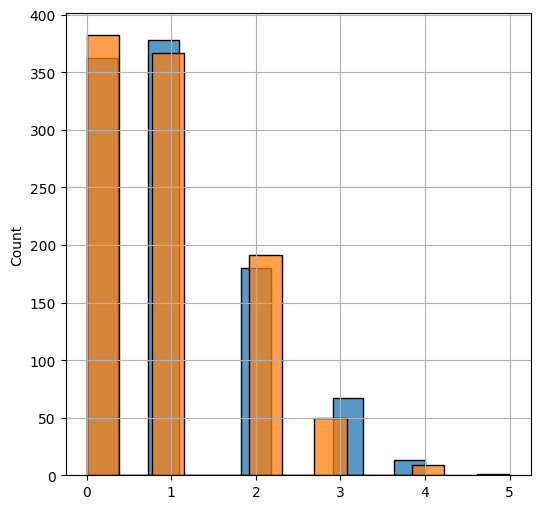

In [ ]:
#1
c = 2
n = 14
N = 1000

Y = stats.bernoulli(1/2).rvs(size = (N, c * (2 ** n)))
X = list([len([v for v in map(len, ''.join(map(str, Y[i])).split('1')) if v >= n]) for i in range(N)])

plt.figure(figsize=(6, 6))
sb.histplot(X)
sb.histplot(stats.poisson(np.array(X).mean()).rvs(size=len(X)))
plt.grid()
plt.show()


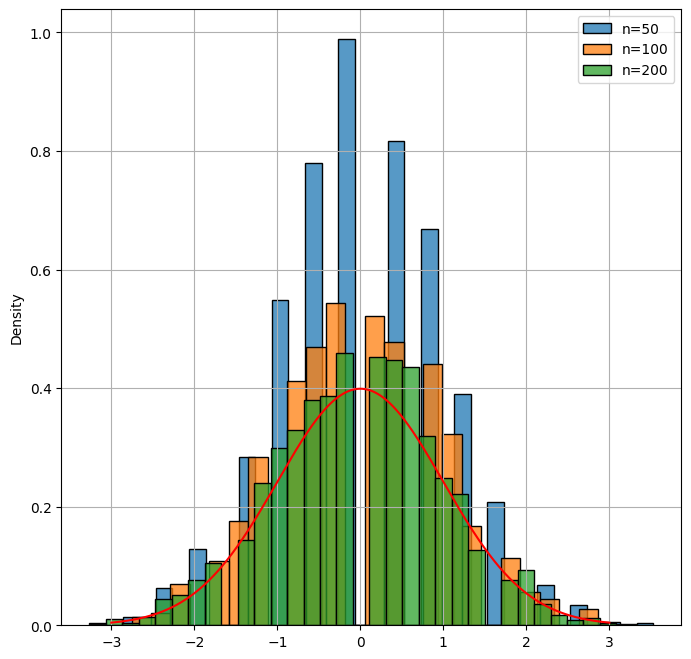

In [3]:
#2
N = 2500

plt.figure(figsize=(8, 8))
for n in [50, 100, 200]:
  mu = n  * ((1 - 1 / n) ** n)
  sigma = np.sqrt(n * (n - 1) * ((1 - 2 / n) ** n) + mu - mu ** 2)
  Y = stats.multinomial(n=n, p=np.ones(n) / n).rvs(size = N)
  X = np.sum(Y == 0, axis = 1)
  sb.histplot((X - mu) / sigma, label=f'n={n}', stat='density')
x = np.linspace(-3, 3, 3000)
plt.plot(x, stats.norm().pdf(x), color='red')
plt.grid()
plt.legend()
plt.show()

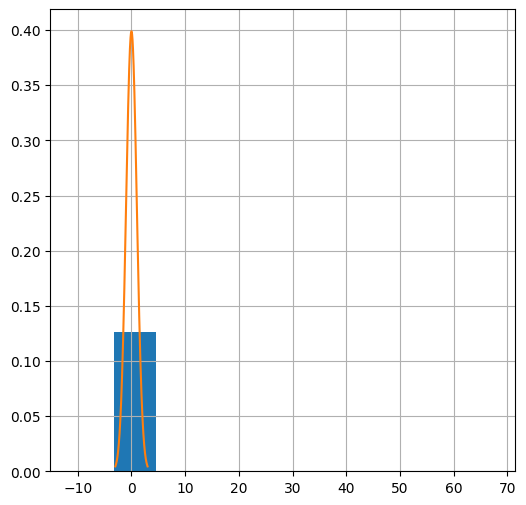

In [ ]:
#4

n = 5000
N = 5000 # размер выборки S_n^*

X = np.empty((n, N))
x = np.linspace(-3, 3, 3000)
for i in range(1, n + 1):
  X[i - 1] = np.random.choice([i, -i, 0], size = N, p = [1 / (2 * (i ** 2)), 1 / (2 * (i ** 2)), 1 - 1 / (i ** 2)])
plt.figure(figsize=(6, 6))
plt.hist(X.sum(axis=0) / np.sqrt(n), density=True)
plt.plot(x, stats.norm().pdf(x))
plt.grid()
plt.show()

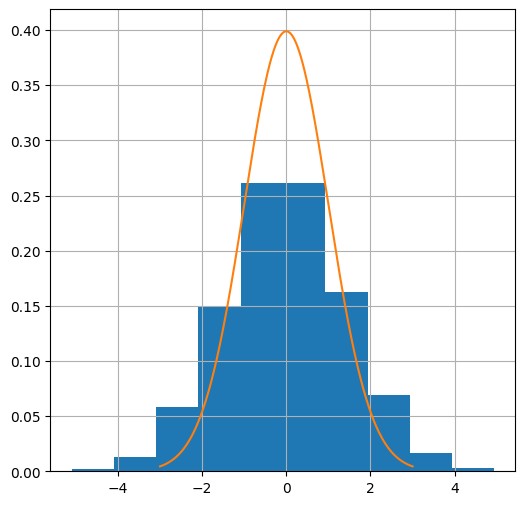

In [ ]:
X = np.empty((n, N))
x = np.linspace(-3, 3, 3000)
for i in range(1, n + 1):
  X[i - 1] = np.random.choice([i, -i, 0], size = N, p = [1 / 4, 1 / 4, 1 / 2])
plt.figure(figsize=(6, 6))
plt.hist(X.sum(axis=0) / np.sqrt(n * (n + 1) * (n + 2) / 12), density=True)
plt.plot(x, stats.norm().pdf(x))
plt.grid()
plt.show()

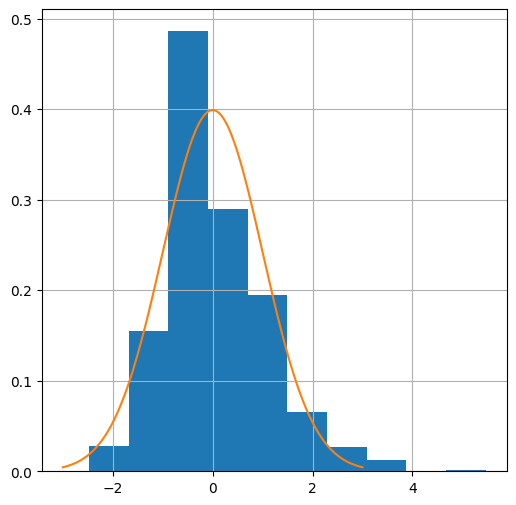

In [ ]:
#5

n = 1000
N = 1000

X = np.empty((n, N))
for i in range(1, n + 1):
  X[i - 1] = stats.geom(1 - 1 / (i + 1)).rvs(size = N) - 1
mu = np.sum([1 / i for i in range(1, n + 1)])
s = np.sqrt(np.sum([(i + 1) / (i ** 2) for i in range(1, n + 1)]))

plt.figure(figsize=(6, 6))
plt.hist((X.sum(axis=0) - mu) / s, density=True)
plt.plot(np.linspace(-3, 3, 3000), stats.norm().pdf(np.linspace(-3, 3, 3000)))
plt.grid()
plt.show()